In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
import seaborn as sns
%matplotlib inline             


In [ ]:
# df = pd.read_csv('masterfile.csv',index_col='Date',parse_dates=True)
# df2 = df[['deaths', 'cases', 'total_doses']]
# df2=df2.dropna()
# df2

In [2]:
df = pd.read_csv('masterfile.csv')
df2 = df[['deaths', 'cases', 'total_doses']]
df2=df2.dropna()
df2

,deaths,cases,total_doses
0,149,9087,5
1,129,8799,6
2,157,7812,9
3,147,7239,13
4,148,7215,6
...,...,...,...
808,3,2241,93360
809,0,1670,119568
810,1,1088,49843
811,1,815,24681


In [3]:
print(df2)
df2_train=df.iloc[:-271]
df2_test=df.iloc[-271:]
print(df2_train.shape)
print(df2_test.shape)

     deaths  cases  total_doses
0       149   9087            5
1       129   8799            6
2       157   7812            9
3       147   7239           13
4       148   7215            6
..      ...    ...          ...
808       3   2241        93360
809       0   1670       119568
810       1   1088        49843
811       1    815        24681
812       0    748        97053

[813 rows x 3 columns]
(542, 5)
(271, 5)


In [7]:
df2_train

,Date,deaths,cases,total_doses,cumulative_total_doses
0,7/27/2020,149,9087,5,6
1,7/28/2020,129,8799,6,12
2,7/29/2020,157,7812,9,21
3,7/30/2020,147,7239,13,34
4,7/31/2020,148,7215,6,40
...,...,...,...,...,...
537,1/15/2022,219,58459,118984,67182420
538,1/16/2022,225,40304,55337,67237757
539,1/17/2022,217,81273,140797,67378554
540,1/18/2022,235,119649,164571,67543125


In [8]:
df2_train = df2_train[['deaths', 'cases', 'total_doses']]
df2_train.reset_index(inplace=True)
del df2_train[df2_train.columns[0]]
df2_train

,deaths,cases,total_doses
0,149,9087,5
1,129,8799,6
2,157,7812,9
3,147,7239,13
4,148,7215,6
...,...,...,...
537,219,58459,118984
538,225,40304,55337
539,217,81273,140797
540,235,119649,164571


In [4]:
df2_test

,Date,deaths,cases,total_doses,cumulative_total_doses
542,1/20/2022,250,89862,156218,67862374
543,1/21/2022,266,77207,185307,68047681
544,1/22/2022,250,39861,97845,68145526
545,1/23/2022,273,28343,44999,68190525
546,1/24/2022,227,70488,135141,68325666
...,...,...,...,...,...
808,10/13/2022,3,2241,93360,81214586
809,10/14/2022,0,1670,119568,81334154
810,10/15/2022,1,1088,49843,81383997
811,10/16/2022,1,815,24681,81408678


In [5]:
df2_test = df2_test[['deaths', 'cases', 'total_doses']]
df2_test.reset_index(inplace=True)
del df2_test[df2_test.columns[0]]
df2_test

,deaths,cases,total_doses
0,250,89862,156218
1,266,77207,185307
2,250,39861,97845
3,273,28343,44999
4,227,70488,135141
...,...,...,...
266,3,2241,93360
267,0,1670,119568
268,1,1088,49843
269,1,815,24681


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2_train_scaled = sc.fit_transform(df2_train)
df2_train_scaled 
print(df2_train_scaled.shape)

(542, 3)


In [10]:
sc2 = StandardScaler()
df2_train_scaled_y = sc2.fit_transform(df2_train[['cases']]) 
print(df2_train_scaled_y.shape)
df2_train_scaled_y

(542, 1)


array([[-1.69154931e-01],
       [-1.81857407e-01],
       [-2.25389850e-01],
       [-2.50662484e-01],
       [-2.51721024e-01],
       [-3.32346461e-01],
       [-4.12398523e-01],
       [-2.36636834e-01],
       [-2.51235860e-01],
       [-2.74259098e-01],
       [-2.93930293e-01],
       [-2.85594293e-01],
       [-3.80554122e-01],
       [-4.29776216e-01],
       [-2.57322463e-01],
       [-2.96135584e-01],
       [-3.07073827e-01],
       [-3.42534906e-01],
       [-3.40064980e-01],
       [-4.08296682e-01],
       [-4.51564491e-01],
       [-3.15365721e-01],
       [-3.37683266e-01],
       [-3.63617487e-01],
       [-3.63926228e-01],
       [-3.75702482e-01],
       [-4.32554883e-01],
       [-4.56636660e-01],
       [-3.29170842e-01],
       [-3.53164408e-01],
       [-3.66749000e-01],
       [-3.94315137e-01],
       [-3.96299899e-01],
       [-4.54078522e-01],
       [-4.70529993e-01],
       [-3.78392937e-01],
       [-3.67278270e-01],
       [-3.91624682e-01],
       [-4.0

In [11]:
hops = 14
no_records = 542
no_cols = 3
X_train = []
y_train = []
for i in range(14, 541):
    X_train.append(df2_train_scaled[i-14:i])
    y_train.append(df2_train_scaled_y[i][0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
print(X_train.shape)
print(y_train.shape)

(527, 14, 3)
(527,)


In [13]:
X_train_shape = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_train_shape.shape

(527, 14, 3)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [74]:
# define model
model = Sequential()
model.add(LSTM(units= 50, return_sequences=True, input_shape=(14,3)))
model.add(Dropout(0.2))
model.add(LSTM(units= 50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [75]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 14, 50)            10800     
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 50)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_19 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X_train_shape, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17/17 [==============================] - 2s 10ms/step - loss: 0.8240 - mean_absolute_error: 0.4957
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 0.3672 - mean_absolute_error: 0.2718
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 0.1494 - mean_absolute_error: 0.2113
Epoch 4/100
17/17 [==============================] - 0s 9ms/step - loss: 0.1955 - mean_absolute_error: 0.2117
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 0.2190 - mean_absolute_error: 0.2217
Epoch 6/100
17/17 [==============================] - 0s 9ms/step - loss: 0.2093 - mean_absolute_error: 0.2227
Epoch 7/100
17/17 [==============================] - 0s 9ms/step - loss: 0.1467 - mean_absolute_error: 0.1784
Epoch 8/100
17/17 [==============================] - 0s 8ms/step - loss: 0.2048 - mean_absolute_error: 0.2048
Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.1579 - mean_absolute_error: 0.1869
Epoch 10/

In [70]:
# evaluate the model
train_mse = model.evaluate(X_train_shape, y_train, verbose=0)
test_mse = model.evaluate(X_train_shape, y_train, verbose=0)
print((train_mse, test_mse))

([0.02376522310078144, 0.02376522310078144], [0.02376522310078144, 0.02376522310078144])


In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_train_shape, y_train,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

17/17 - 1s - loss: 0.0287 - accuracy: 0.0000e+00
Loss: 0.028668398037552834, Accuracy: 0.0


In [18]:
df1_train_last14 = df2_train.iloc[-14:]
df1_test_full = df2_test
full_df = pd.concat((df1_train_last14, df1_test_full), axis=0)
print(full_df.shape)
full_df.shape

(285, 3)


(285, 3)

In [19]:
full_df = sc.transform(full_df)
full_df.shape

(285, 3)

In [20]:
hops = 14
no_records = 285
no_cols = 3
X_train_shape_pred = []
for i in range(14, 285):
    X_train_shape_pred.append(full_df[i-14:i])
X_train_shape_pred = np.array(X_train_shape_pred)
print(X_train_shape_pred.shape)

(271, 14, 3)


In [21]:
len(X_train_shape_pred)

271

In [22]:
ytest = model.predict(X_train_shape_pred)

In [23]:
y_final_pred = sc2.inverse_transform(ytest)
y_final_pred

array([[126350.58  ],
       [102163.336 ],
       [ 67693.09  ],
       [ 50446.81  ],
       [ 74732.43  ],
       [125722.04  ],
       [141390.66  ],
       [139754.73  ],
       [116611.12  ],
       [ 77742.92  ],
       [ 58528.734 ],
       [ 74221.32  ],
       [ 99271.086 ],
       [ 96640.516 ],
       [ 84460.68  ],
       [ 54492.652 ],
       [ 35415.285 ],
       [ 28750.705 ],
       [ 32566.904 ],
       [ 34168.664 ],
       [ 33291.688 ],
       [ 29001.424 ],
       [ 24146.568 ],
       [ 19566.934 ],
       [ 17198.607 ],
       [ 17284.994 ],
       [ 16352.773 ],
       [ 15053.471 ],
       [ 13443.637 ],
       [ 11712.78  ],
       [  9742.719 ],
       [  8579.559 ],
       [  8124.6123],
       [  6981.229 ],
       [  6230.3125],
       [  5544.8936],
       [  4841.4126],
       [  4127.9497],
       [  3734.6997],
       [  3640.017 ],
       [  3307.517 ],
       [  3045.73  ],
       [  2853.732 ],
       [  2803.8804],
       [  2567.5513],
       [  

In [24]:
final_open_pred = pd.DataFrame(y_final_pred)
final_open_pred.columns=['final_open_pred']
final_open_pred

,final_open_pred
0,126350.578125
1,102163.335938
2,67693.093750
3,50446.808594
4,74732.429688
...,...
266,2958.539551
267,2751.880371
268,2382.954590
269,2413.997559


In [25]:
fully_final = pd.concat((final_open_pred, df2_test), axis =1)
fully_final = fully_final[['cases', 'final_open_pred', 'total_doses', 'deaths']]
fully_final

,cases,final_open_pred,total_doses,deaths
0,89862,126350.578125,156218,250
1,77207,102163.335938,185307,266
2,39861,67693.093750,97845,250
3,28343,50446.808594,44999,273
4,70488,74732.429688,135141,227
...,...,...,...,...
266,2241,2958.539551,93360,3
267,1670,2751.880371,119568,0
268,1088,2382.954590,49843,1
269,815,2413.997559,24681,1


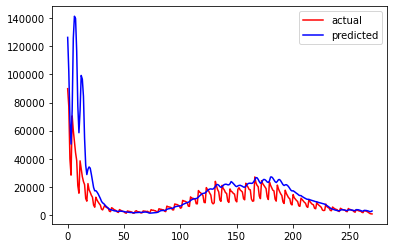

In [29]:
plt.plot(fully_final['cases'], label='actual', color = 'red')
plt.plot(fully_final['final_open_pred'], label = 'predicted', color = 'blue')
plt.legend()
plt.savefig('prediction.png')

In [51]:
fully_final['cases'].mean()

10776.848708487085

In [54]:
rmse=sqrt(mean_squared_error(fully_final['final_open_pred'],fully_final['cases']))
print(rmse)

14712.19122509945
